# Background

### Z+Jets

In [1]:
import awkward as ak
import pandas as pd
import numpy as np
import vector
import uproot
import mplhep as hep
import matplotlib.pyplot as plt
import seaborn as sns
import DM_HEP_AN as dm
from tqdm import tqdm
from funcs import *
hep.style.use("CMS")
#%matplotlib inline
plt.ioff()

lum = 1 # fb-1

In [2]:
nMetaRuns = 7

CSs = {"run": [],
       "ZpJets": [],
       "errorZpJets": [],
       "NeventsZpJets": [],
       "WpJets": [],
       "errorWpJets": [],
       "NeventsWpJets": []}

run = 1

for i in tqdm(range(nMetaRuns)):
       outFile = f"background/outputs/output{i}.out"
       outData = open(outFile, "r")
       outText = outData.read()
       outData.close()

       counter = 1
       indexWpJ = int(outText.find('WpJets'))
       indexZpJ = int(outText.find('ZpJets'))
       if indexZpJ < indexWpJ:
              BGtype1 = 'Z'
              BGtype2 = 'W'
       else:
              BGtype1 = 'W'
              BGtype2 = 'Z'
       indexCS = outText.find('Matched cross-section :   ')
       indexPM = outText.find(' +- ', indexCS)
       indexPB = outText.find(' pb', indexCS)
       indexNe = outText.find('Nb of events after merging :  ', indexCS)
       while indexCS != -1:
              if counter <= 10:
                     CSs[f"{BGtype1}pJets"].append(float(outText[indexCS+26:indexPM]))
                     CSs[f"error{BGtype1}pJets"].append(float(outText[indexPM+4:indexPB]))
                     CSs[f"Nevents{BGtype1}pJets"].append(int(outText[indexNe+30:indexNe+36]))
                     CSs["run"].append(run)
                     run += 1
              else:
                     CSs[f"{BGtype2}pJets"].append(float(outText[indexCS+26:indexPM]))
                     CSs[f"error{BGtype2}pJets"].append(float(outText[indexPM+4:indexPB]))
                     CSs[f"Nevents{BGtype2}pJets"].append(int(outText[indexNe+30:indexNe+36]))
              indexCS = outText.find('Matched cross-section :', indexCS+1)
              indexPM = outText.find(' +- ', indexCS)
              indexPB = outText.find(' pb', indexCS)
              indexNe = outText.find('Nb of events after merging :  ', indexCS)
              counter +=1

100%|██████████| 7/7 [00:00<00:00, 1924.75it/s]


In [3]:
CSs.keys()

dict_keys(['run', 'ZpJets', 'errorZpJets', 'NeventsZpJets', 'WpJets', 'errorWpJets', 'NeventsWpJets'])

In [4]:
crossSec = pd.DataFrame(CSs) # pb
crossSec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   run            70 non-null     int64  
 1   ZpJets         70 non-null     float64
 2   errorZpJets    70 non-null     float64
 3   NeventsZpJets  70 non-null     int64  
 4   WpJets         70 non-null     float64
 5   errorWpJets    70 non-null     float64
 6   NeventsWpJets  70 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 4.0 KB


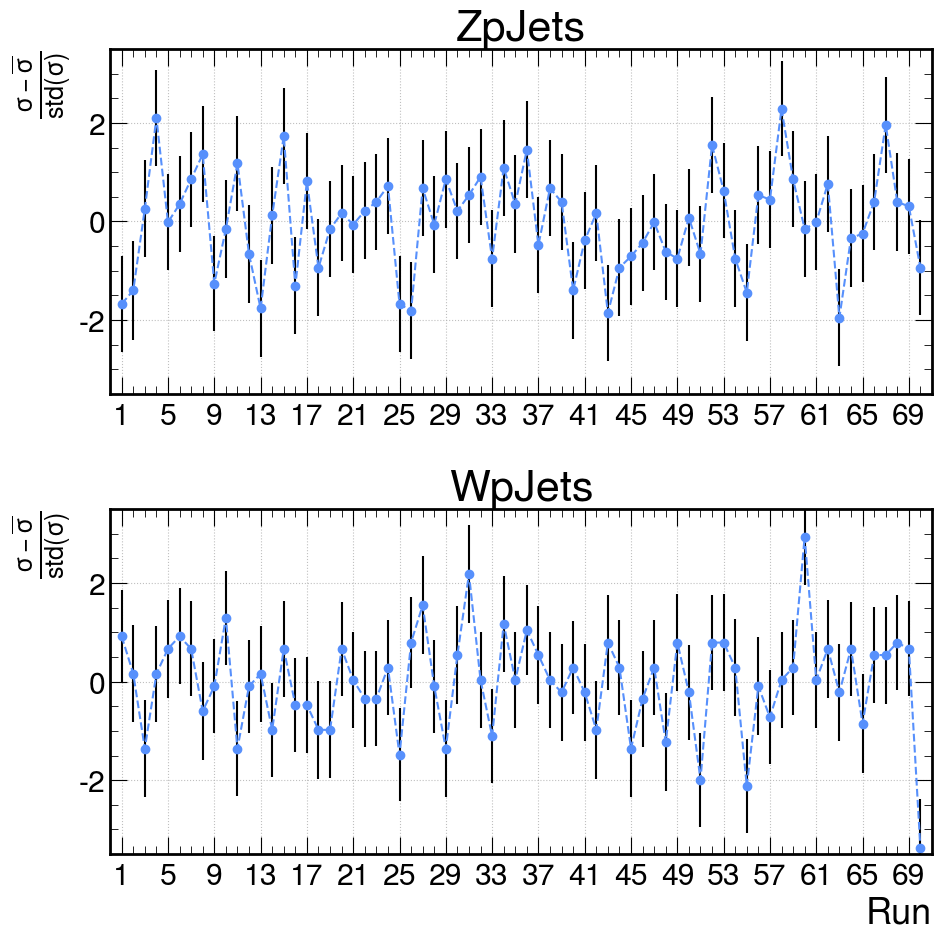

In [5]:
fig, ax = plt.subplots(2,1)
ax[0].errorbar(crossSec["run"], (crossSec["ZpJets"]-crossSec["ZpJets"].mean())/crossSec["ZpJets"].std(), yerr=crossSec["errorZpJets"]/crossSec["ZpJets"].std(), marker='o', linestyle='--', ecolor="black")
ax[1].errorbar(crossSec["run"], (crossSec["WpJets"]-crossSec["WpJets"].mean())/crossSec["WpJets"].std(), yerr=crossSec["errorWpJets"]/crossSec["WpJets"].std(), marker='o', linestyle='--', ecolor="black")
ax[0].set_title("ZpJets")
ax[1].set_title("WpJets")
ax[1].set_xlabel("Run")
ax[0].set_ylabel(r"$\frac{\sigma - \overline{\sigma}}{\mathrm{std}(\sigma)}$")
ax[1].set_ylabel(r"$\frac{\sigma - \overline{\sigma}}{\mathrm{std}(\sigma)}$")
ax[0].set_xlim(crossSec.run.min()-1,crossSec.run.max()+1)
ax[1].set_xlim(crossSec.run.min()-1,crossSec.run.max()+1)
ax[0].set_ylim(-3.5,3.5)
ax[1].set_ylim(-3.5,3.5)
ax[0].set_xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
ax[1].set_xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
ax[0].grid()
ax[1].grid()
plt.tight_layout()
plt.show()

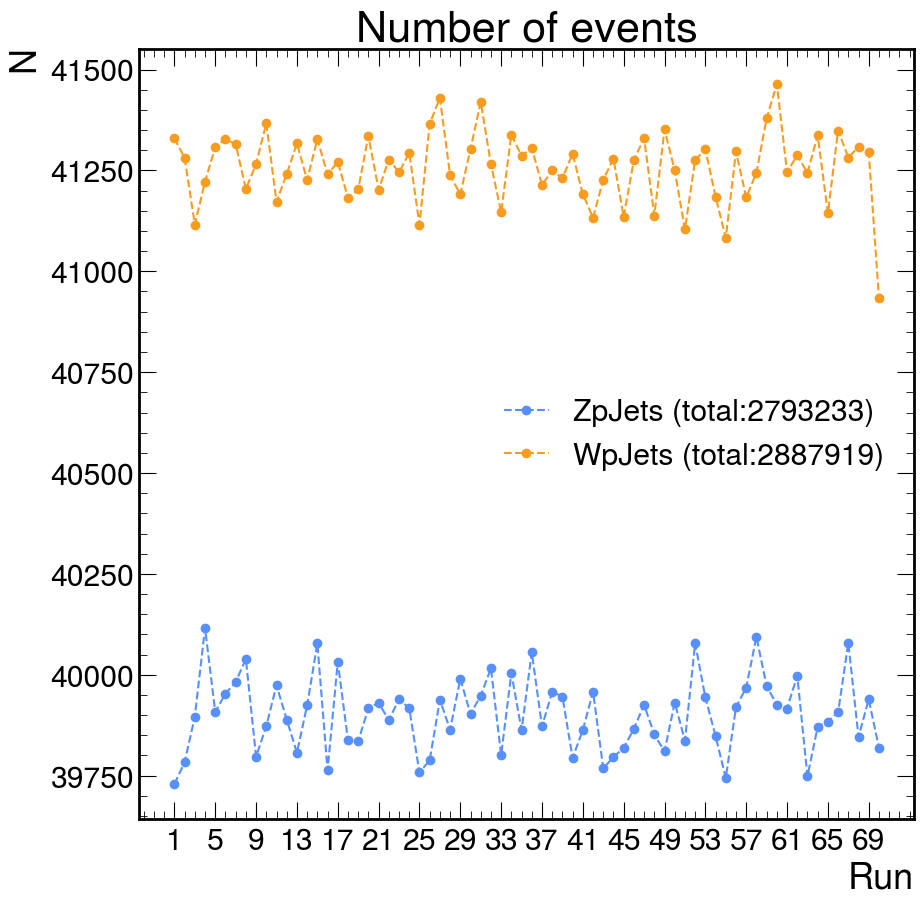

In [8]:
totalEventsZpJets = sum(crossSec['NeventsZpJets'])
totalEventsWpJets = sum(crossSec['NeventsWpJets'])
plt.plot(crossSec["run"],crossSec["NeventsZpJets"], marker='o', linestyle='--', label=f'ZpJets (total:{totalEventsZpJets})')
plt.plot(crossSec["run"],crossSec["NeventsWpJets"], marker='o', linestyle='--', label=f'WpJets (total:{totalEventsWpJets})')
plt.title("Number of events")
plt.xlabel("Run")
plt.ylabel(r"$N$")
plt.xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
plt.legend()
plt.show()

In [9]:
(crossSec["NeventsZpJets"]*crossSec["errorZpJets"]/(crossSec["ZpJets"]*1000)**2)

0     1.080833e-08
1     1.106774e-08
2     1.085252e-08
3     1.064834e-08
4     1.068803e-08
          ...     
65    1.069140e-08
66    1.062047e-08
67    1.088715e-08
68    1.068454e-08
69    1.068703e-08
Length: 70, dtype: float64

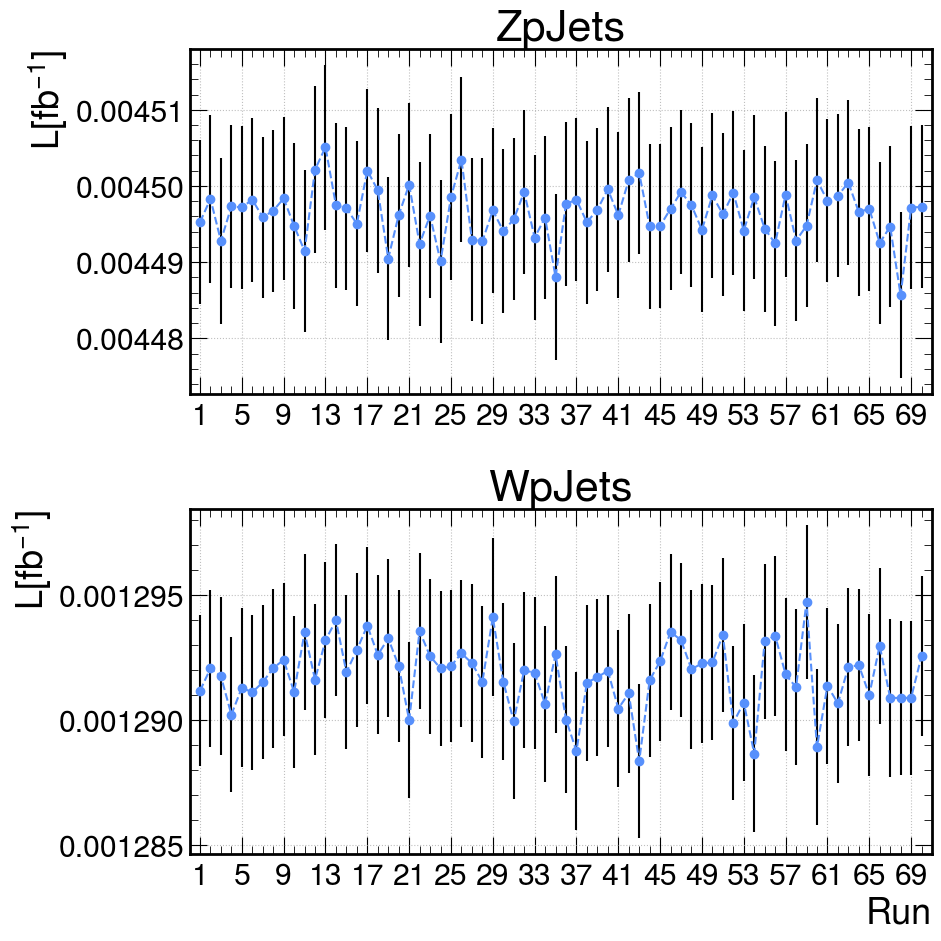

In [10]:
fig, ax = plt.subplots(2,1)
ax[0].errorbar(crossSec["run"], crossSec["NeventsZpJets"]*(1/1000)/(crossSec["ZpJets"]), yerr=(crossSec["NeventsZpJets"]*crossSec["errorZpJets"]*(1/1000)/(crossSec["ZpJets"])**2), marker='o', linestyle='--', ecolor="black")
ax[1].errorbar(crossSec["run"], crossSec["NeventsWpJets"]*(1/1000)/(crossSec["WpJets"]), yerr=(crossSec["NeventsWpJets"]*crossSec["errorWpJets"]*(1/1000)/(crossSec["WpJets"])**2), marker='o', linestyle='--', ecolor="black")
ax[0].set_title("ZpJets")
ax[1].set_title("WpJets")
ax[1].set_xlabel("Run")
ax[0].set_ylabel(r"$\mathcal{L} [$fb$^{-1}]$")
ax[1].set_ylabel(r"$\mathcal{L} [$fb$^{-1}]$")
ax[0].set_xlim(crossSec.run.min()-1,crossSec.run.max()+1)
ax[1].set_xlim(crossSec.run.min()-1,crossSec.run.max()+1)
#ax[0].set_ylim(-3,3)
#ax[1].set_ylim(-3,3)
ax[0].set_xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
ax[1].set_xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
ax[0].grid()
ax[1].grid()
plt.tight_layout()
plt.show()

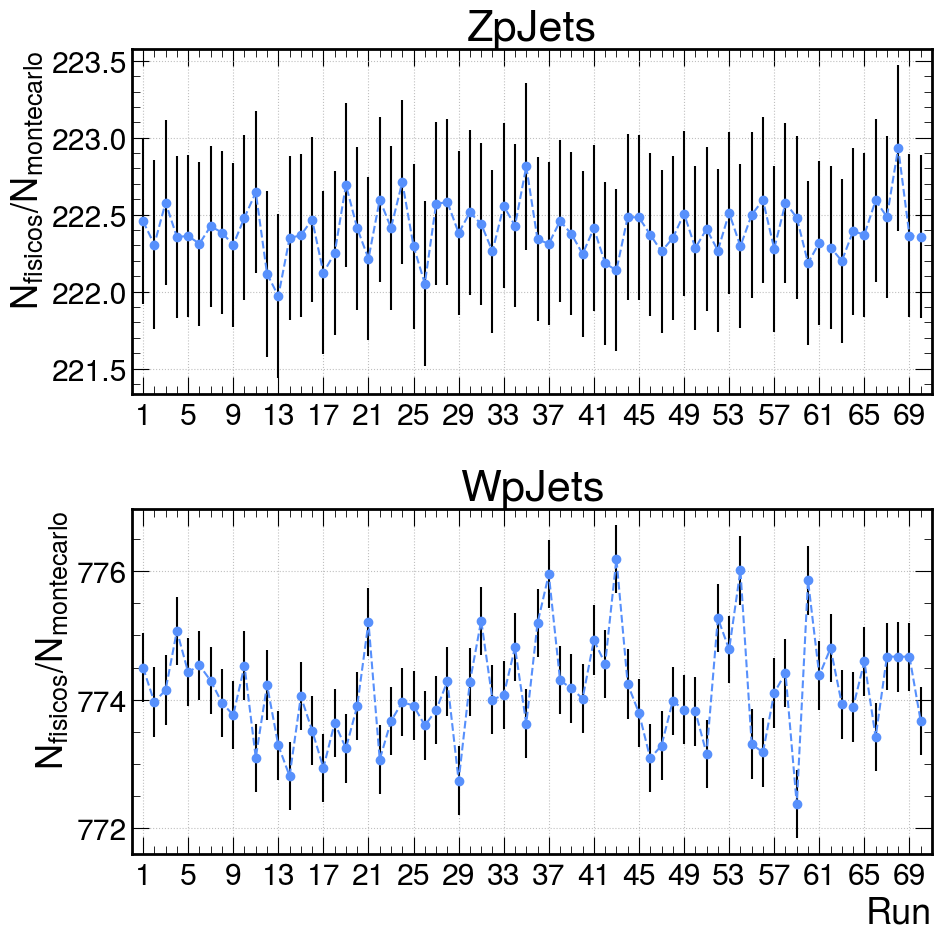

In [11]:
fig, ax = plt.subplots(2,1)
ax[0].errorbar(crossSec["run"], (crossSec["ZpJets"]*1000*lum)/crossSec["NeventsZpJets"], yerr=(crossSec["errorZpJets"]*1000*lum)/crossSec["NeventsZpJets"], marker='o', linestyle='--', ecolor="black")
ax[1].errorbar(crossSec["run"], (crossSec["WpJets"]*1000*lum)/crossSec["NeventsWpJets"], yerr=(crossSec["errorZpJets"]*1000*lum)/crossSec["NeventsZpJets"], marker='o', linestyle='--', ecolor="black")
ax[0].set_title("ZpJets")
ax[1].set_title("WpJets")
ax[1].set_xlabel("Run")
ax[0].set_ylabel(r"$N_{fisicos}/N_{montecarlo}$")
ax[1].set_ylabel(r"$N_{fisicos}/N_{montecarlo}$")
ax[0].set_xlim(crossSec.run.min()-1,crossSec.run.max()+1)
ax[1].set_xlim(crossSec.run.min()-1,crossSec.run.max()+1)
#ax[0].set_ylim(-3,3)
#ax[1].set_ylim(-3,3)
ax[0].set_xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
ax[1].set_xticks([i for i in range(crossSec.run.min(),crossSec.run.max()+1, 4)])
ax[0].grid()
ax[1].grid()
plt.tight_layout()
plt.show()

Valores promedio

In [12]:
labels = ['WpJets', 'ZpJets']
CSmean = [crossSec[i].mean() for i in labels]
dCSmean = [crossSec[f'error{i}'].mean() for i in labels]
totEvents = [crossSec[f'Nevents{i}'].sum() for i in labels]
totLuminosity = [totEvents[i]/CSmean[i] for i in range(2)]
dtotLuminosity = [dCSmean[i]*totLuminosity[i]/CSmean[i] for i in range(2)]
weight = [CSmean[i]*1000*lum/totEvents[i] for i in range(2)]
dweight = [dCSmean[i]*1000*lum/totEvents[i] for i in range(2)]
phyEvents = [weight[i]*totEvents[i] for i in range(2)]

print("Cross-section:")
for i in range(2):
    print(f"\t{labels[i]}: ",f"{CSmean[i]} +- {round(dCSmean[i],2)} pb")

print("Total Events:")
for i in range(2):
    print(f"\t{labels[i]}: ",f"{totEvents[i]}")

print("MG+Pythia Luminosity:")
for i in range(2):
    print(f"\t{labels[i]}: ",f"{round(totLuminosity[i],2)} +- {round(dtotLuminosity[i],2)} pb^(-1)")

print(f"Weights with L={lum} fb^(-1)")
for i in range(2):
    print(f"\t{labels[i]}: ",f"{round(weight[i],2)} +- {round(dweight[i],2)}")

print("Total Physical Events:")
for i in range(2):
    print(f"\t{labels[i]}: ",f"{phyEvents[i]}")

Cross-section:
	WpJets:  31937.285714285714 +- 76.87 pb
	ZpJets:  8874.371428571429 +- 21.25 pb
Total Events:
	WpJets:  2887919
	ZpJets:  2793233
MG+Pythia Luminosity:
	WpJets:  90.42 +- 0.22 pb^(-1)
	ZpJets:  314.75 +- 0.75 pb^(-1)
Weights with L=1 fb^(-1)
	WpJets:  11.06 +- 0.03
	ZpJets:  3.18 +- 0.01
Total Physical Events:
	WpJets:  31937285.714285716
	ZpJets:  8874371.42857143


In [13]:
Weight = {'WpJets': [weight[0]], 'ZpJets': [weight[1]]}
#dfWeight = pd.DataFrame(Weight)
#dfWeight.to_csv("BGweigths.csv")

In [14]:
# ZpJets
csvdir = "background/ZpJets"
rootdir = "samples/ZpJets"
nFiles = 70
for i in tqdm(range(nFiles)):
    df = pd.read_csv(f'{csvdir}/ZpJets_{i+1}.csv')
    df = construct_variables(df)
    ddict = df.to_dict(orient='list')
    ddict['lumiWeight'] = Weight['ZpJets']*np.ones_like(ddict['jet_pt0'])
    with uproot.recreate(f'{rootdir}/ZpJets_{i}.root') as rootFile:
        rootFile['VBF_treeVariables_step0'] = ddict
        rootFile['Cross_Section'] = {'nominal_value': [CSs['ZpJets'][i]], 'std_dev': [CSs['errorZpJets'][i]]}

100%|██████████| 70/70 [07:39<00:00,  6.56s/it]


In [15]:
# WpJets
csvdir = "background/WpJets"
rootdir = "samples/WpJets"
nFiles = 70
for i in tqdm(range(nFiles)):
    df = pd.read_csv(f'{csvdir}/WpJets_{i+1}.csv')
    df = construct_variables(df)
    ddict = df.to_dict(orient='list')
    ddict['lumiWeight'] = Weight['WpJets']*np.ones_like(ddict['jet_pt0'])
    with uproot.recreate(f'{rootdir}/WpJets_{i}.root') as rootFile:
        rootFile['Cross_Section'] = {'nominal_value': [CSs['WpJets'][i]], 'std_dev': [CSs['errorWpJets'][i]]}

100%|██████████| 70/70 [05:20<00:00,  4.58s/it]
